### Importion de packages

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

### Chargement de données

In [5]:
col_names = [
    'Season',
    'Age',
    'Childish_diseases',
    'Accident',
    'Surgical_intervention',
    'High_fever',
    'Alcohol_consumption',
    'Smoking_habit',
    'Hours_sitting',
    'Diagnosis'
]

df = pd.read_csv("fertility_Diagnosis.txt", names=col_names, sep=",")
print(df.head())


   Season   Age  Childish_diseases  Accident  Surgical_intervention  \
0   -0.33  0.69                  0         1                      1   
1   -0.33  0.94                  1         0                      1   
2   -0.33  0.50                  1         0                      0   
3   -0.33  0.75                  0         1                      1   
4   -0.33  0.67                  1         1                      0   

   High_fever  Alcohol_consumption  Smoking_habit  Hours_sitting Diagnosis  
0           0                  0.8              0           0.88         N  
1           0                  0.8              1           0.31         O  
2           0                  1.0             -1           0.50         N  
3           0                  1.0             -1           0.38         N  
4           0                  0.8             -1           0.50         O  


In [8]:
 df.shape

(100, 10)

In [9]:
df.dtypes

Season                   float64
Age                      float64
Childish_diseases          int64
Accident                   int64
Surgical_intervention      int64
High_fever                 int64
Alcohol_consumption      float64
Smoking_habit              int64
Hours_sitting            float64
Diagnosis                 object
dtype: object

In [10]:
df.describe()

,Season,Age,Childish_diseases,Accident,Surgical_intervention,High_fever,Alcohol_consumption,Smoking_habit,Hours_sitting
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,-0.078900,0.669000,0.870000,0.440000,0.510000,0.190000,0.832000,-0.350000,0.406800
std,0.796725,0.121319,0.337998,0.498888,0.502418,0.580752,0.167501,0.808728,0.186395
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.isnull().sum()

Season                   0
Age                      0
Childish_diseases        0
Accident                 0
Surgical_intervention    0
High_fever               0
Alcohol_consumption      0
Smoking_habit            0
Hours_sitting            0
Diagnosis                0
dtype: int64

In [12]:
df['Diagnosis'].value_counts()

Diagnosis
N    88
O    12
Name: count, dtype: int64

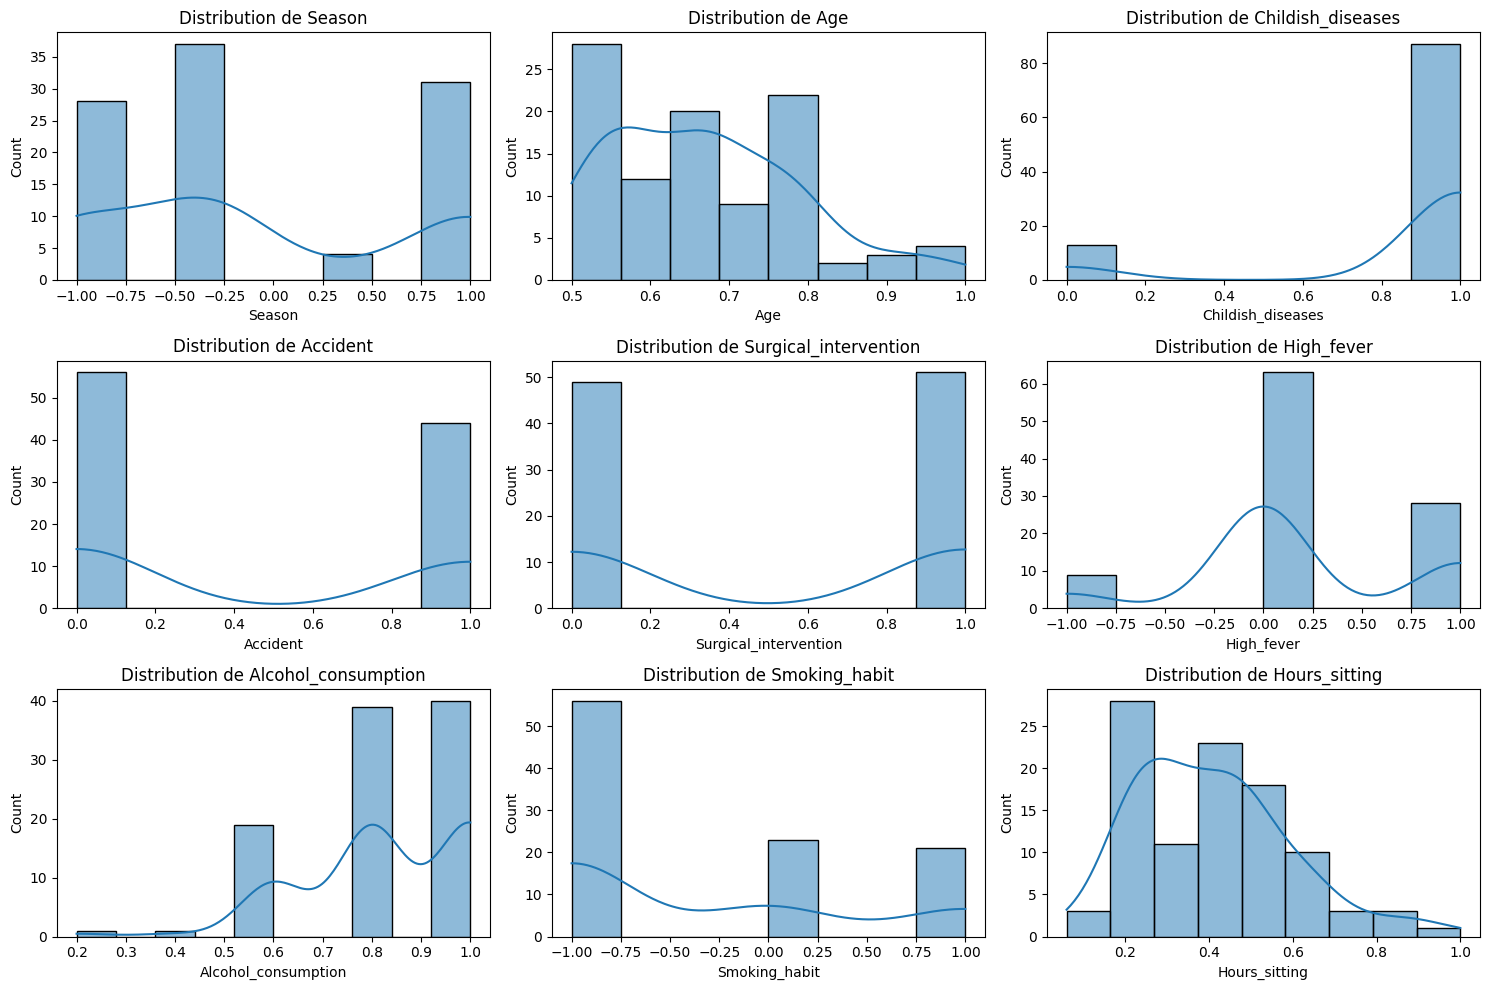

In [17]:
numerical_features = df.columns.drop('Diagnosis')
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()


In [13]:
for col in ['Childish_diseases', 'Accident', 'Surgical_intervention', 'Smoking_habit']:
    print(f"Répartition de {col} :")
    print(df[col].value_counts())
    print()

Répartition de Childish_diseases :
Childish_diseases
1    87
0    13
Name: count, dtype: int64

Répartition de Accident :
Accident
0    56
1    44
Name: count, dtype: int64

Répartition de Surgical_intervention :
Surgical_intervention
1    51
0    49
Name: count, dtype: int64

Répartition de Smoking_habit :
Smoking_habit
-1    56
 0    23
 1    21
Name: count, dtype: int64



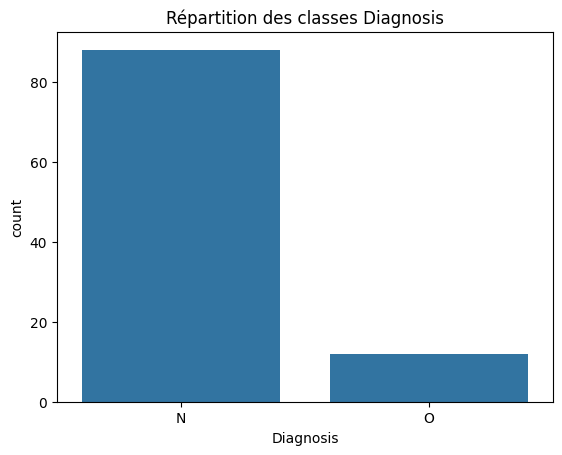

In [18]:
sns.countplot(x='Diagnosis', data=df)
plt.title('Répartition des classes Diagnosis')
plt.show()

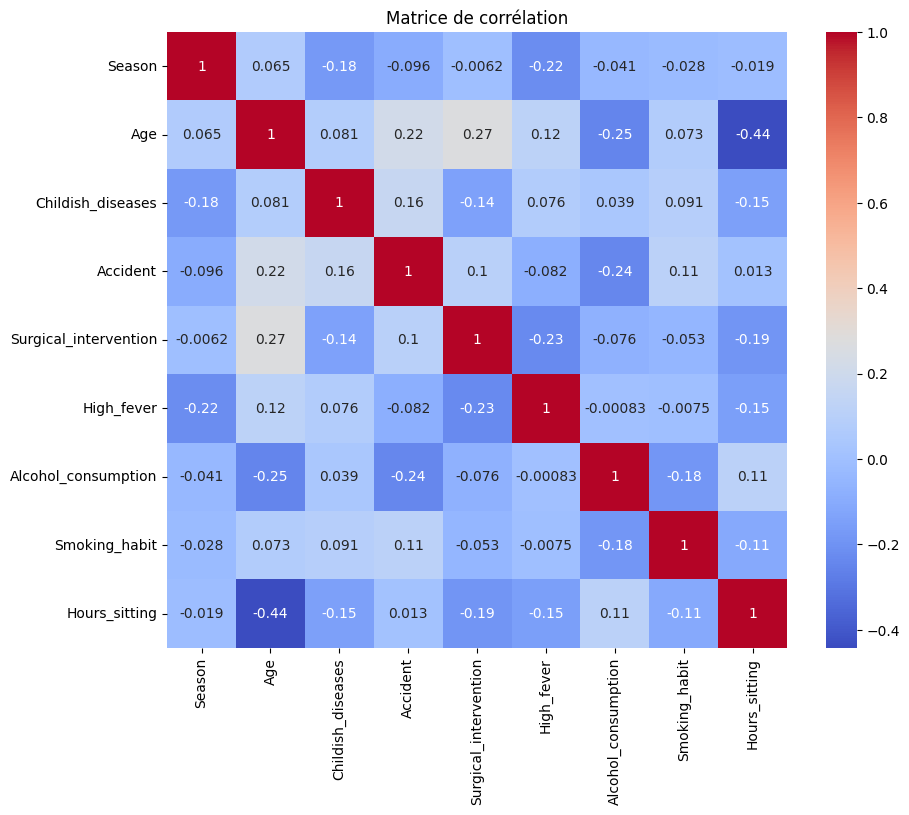

In [20]:
# Sélectionner uniquement les colonnes numériques (exclure Diagnosis)
numeric_df = df.select_dtypes(include=['number'])

# Calculer la matrice de corrélation uniquement sur ces colonnes
corr = numeric_df.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()


### 4. Prétraitements de données 

In [21]:
df['Diagnosis'] = df['Diagnosis'].map({'N': 0, 'O': 1})

In [22]:
df.head

<bound method NDFrame.head of     Season   Age  Childish_diseases  Accident  Surgical_intervention  \
0    -0.33  0.69                  0         1                      1   
1    -0.33  0.94                  1         0                      1   
2    -0.33  0.50                  1         0                      0   
3    -0.33  0.75                  0         1                      1   
4    -0.33  0.67                  1         1                      0   
..     ...   ...                ...       ...                    ...   
95   -1.00  0.67                  1         0                      0   
96   -1.00  0.61                  1         0                      0   
97   -1.00  0.67                  1         1                      1   
98   -1.00  0.64                  1         0                      1   
99   -1.00  0.69                  0         1                      1   

    High_fever  Alcohol_consumption  Smoking_habit  Hours_sitting  Diagnosis  
0            0            

In [23]:
df.dtypes

Season                   float64
Age                      float64
Childish_diseases          int64
Accident                   int64
Surgical_intervention      int64
High_fever                 int64
Alcohol_consumption      float64
Smoking_habit              int64
Hours_sitting            float64
Diagnosis                  int64
dtype: object

### 5. Division de données

In [25]:
X = df.iloc [:, :-1]
y = df.iloc[:, -1]

In [26]:
scaler = StandardScaler()
X_normal = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_normal, y, test_size=0.25, random_state=27)

In [30]:
X_train

array([[-1.16193136, -0.90298767,  0.38655567,  1.12815215, -1.02020406,
        -0.32881028, -0.19200614,  1.67769837,  0.50253169],
       [ 0.51581124,  0.91955625,  0.38655567, -0.88640526, -1.02020406,
        -0.32881028,  1.00803226,  1.67769837, -1.86993553],
       [-0.31675276,  0.67102753,  0.38655567,  1.12815215,  0.98019606,
        -0.32881028, -1.39204455,  1.67769837, -0.84546105],
       [ 1.36098984,  0.00828429, -2.5869495 , -0.88640526,  0.98019606,
        -0.32881028, -0.19200614, -0.8077807 , -0.84546105],
       [-1.16193136,  0.91955625,  0.38655567,  1.12815215, -1.02020406,
         1.40177016, -1.39204455, -0.8077807 , -0.14450482],
       [-1.16193136, -1.15151638,  0.38655567, -0.88640526, -1.02020406,
         1.40177016,  1.00803226,  0.43495884,  0.17901344],
       [ 1.36098984,  0.67102753,  0.38655567,  1.12815215,  0.98019606,
        -0.32881028, -0.19200614,  1.67769837, -0.84546105],
       [ 1.36098984,  0.67102753,  0.38655567, -0.88640526, -1

In [29]:
y_train

41    0
91    0
86    0
20    0
35    0
     ..
98    0
31    0
72    0
56    0
19    1
Name: Diagnosis, Length: 75, dtype: int64

In [44]:
# Creer une instance de la Classe Sequential
model_dnn = Sequential()

# Ajout de la premiere couche
model_dnn.add(Dense(10, input_shape=(9,), activation='relu'))

# Ajout de la deuxieme couche intermediaire
model_dnn.add(Dense(128, activation='relu'))
model_dnn.add(Dropout(0.5))

# Ajout de la troisieme couche intermediaire
model_dnn.add(Dense(64, activation='relu'))
model_dnn.add(Dropout(0.2))

# Ajout de la qautriem couche intermediaire
model_dnn.add(Dense(32, activation='relu'))

# Ajout de la couche de Sortie
model_dnn.add(Dense(1, activation='softmax'))

# Compiler le model
model_dnn.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Affichage de l'architecture du reseau de neurone
model_dnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 10)             │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,877 (46.39 KB)

 Trainable params: 11,877 (46.39 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
# Entrainement du modele
history = model_dnn.fit(X_train, y_train, epochs=150, verbose=1, validation_data=(X_test, y_test))

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - accuracy: 0.1526 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1487 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - accuracy: 0.1370 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.1409 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.1292 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1682 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1174 - loss: 0.0000e+00 - val_accuracy: 0.0800 - val_loss: 0.0000e+00
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy:

In [46]:
epoch_accuracy = history.history['accuracy']
epoch_loss = history.history['loss']

epoch_val_accuracy = history.history['val_accuracy']
epoch_val_loss = history.history['val_loss']

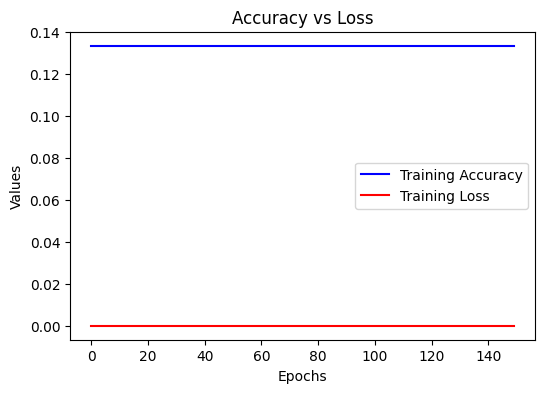

In [47]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='red', label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.title('Accuracy vs Loss')
plt.legend()
plt.show()

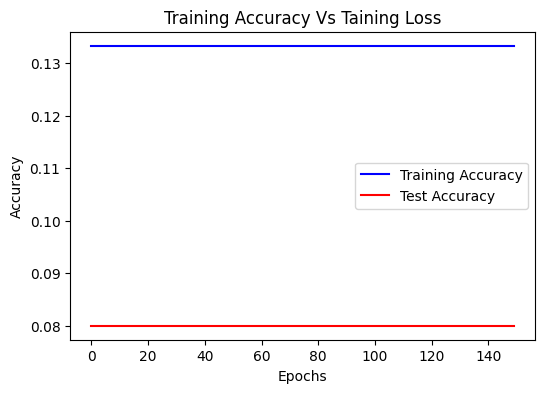

In [48]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_accuracy)), epoch_accuracy, color='blue', label='Training Accuracy')
plt.plot(range(0, len(epoch_val_accuracy)), epoch_val_accuracy, color='red', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

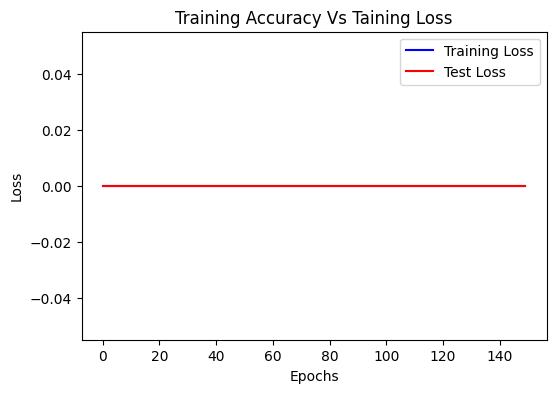

In [49]:
plt.figure(figsize=(6, 4))
plt.plot(range(0, len(epoch_loss)), epoch_loss, color='blue', label='Training Loss')
plt.plot(range(0, len(epoch_val_loss)), epoch_val_loss, color='red', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Accuracy Vs Taining Loss')
plt.legend()
plt.show()

### Evaluation

In [50]:
model_dnn.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.0800 - loss: 0.0000e+00


[0.0, 0.07999999821186066]

### Classification

In [53]:
# Initialisation des modèles
models = {
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
}

# Entraînement, prédiction, évaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print({name} )
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

{'SVM'}
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy                           0.92        25
   macro avg       0.46      0.50      0.48        25
weighted avg       0.85      0.92      0.88        25



{'Decision Tree'}
Accuracy: 0.8400
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91        23
           1       0.25      0.50      0.33         2

    accuracy                           0.84        25
   macro avg       0.60      0.68      0.62        25
weighted avg       0.90      0.84      0.86        25



{'KNN'}
Accuracy: 0.9200
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        23
           1       0.00      0.00      0.00         2

    accuracy            

In [55]:
from sklearn.metrics import mean_squared_error

# Supposons que tu as déjà les prédictions de chaque modèle sur X_test
y_pred_svm = models['SVM'].predict(X_test)
y_pred_dt = models['Decision Tree'].predict(X_test)
y_pred_knn = models['KNN'].predict(X_test)
y_pred_lr = models['Logistic Regression'].predict(X_test)

mse_svm = mean_squared_error(y_test, y_pred_svm)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)
mse_lr = mean_squared_error(y_test, y_pred_lr)

print(f"MSE SVM: {mse_svm:.4f}")
print(f"MSE Decision Tree: {mse_dt:.4f}")
print(f"MSE KNN: {mse_knn:.4f}")
print(f"MSE Logistic Regression: {mse_lr:.4f}")


MSE SVM: 0.0800
MSE Decision Tree: 0.1600
MSE KNN: 0.0800
MSE Logistic Regression: 0.1200


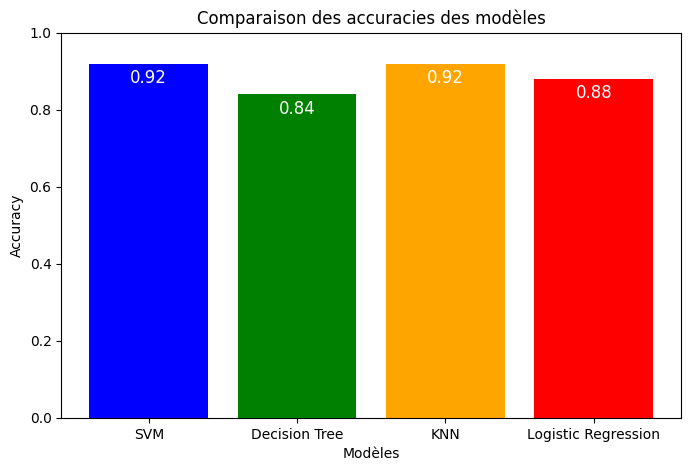

In [56]:

models = ['SVM', 'Decision Tree', 'KNN', 'Logistic Regression']
accuracy = [0.92, 0.84, 0.92, 0.88]

plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracy, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0, 1)
plt.title('Comparaison des accuracies des modèles')
plt.ylabel('Accuracy')
plt.xlabel('Modèles')

# Affichage des valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 0.05, f'{height:.2f}', ha='center', color='white', fontsize=12)

plt.show()
